In [4]:
import  pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from pandas_datareader import DataReader

In [5]:
from datetime import datetime

In [6]:
tech_list = ["AAPL", "GOOG", "MSFT", "AMZN"]

In [7]:
end = datetime.now()
start = datetime(end.year -1, end.month, end.day)

In [8]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, "yahoo", start, end)

In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,77.273962,75.425563,76.232599,76.465000,1.474270e+08,76.121016
std,17.525772,17.093302,17.269487,17.348723,7.140399e+07,17.486583
min,51.744999,51.055000,51.607498,51.424999,1.332256e+07,50.919777
25%,65.110001,63.845001,64.315002,64.857498,1.008056e+08,64.413116
50%,74.470001,71.580002,72.482498,73.162498,1.281860e+08,72.833664
75%,81.805000,80.712502,81.112503,81.302498,1.701084e+08,81.133713
max,132.919998,131.130005,128.697495,131.229996,4.268848e+08,131.229996


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-09-03 to 2020-09-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


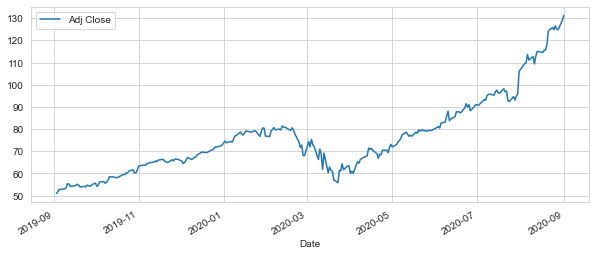

In [11]:
AAPL["Adj Close"].plot(legend=True, figsize=(10,4))

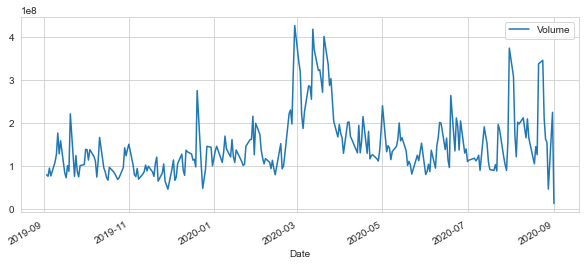

In [12]:
AAPL["Volume"].plot(legend=True, figsize=(10,4))

In [16]:
ma_day = [10,20,50]
for ma in ma_day:
    columun_name = "MA{}".format(ma)
    AAPL[columun_name] = AAPL["Adj Close"].rolling(window=ma).mean()

In [17]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA10,MA20,MA50
Date,,,,,,,,,
2019-09-03,51.744999,51.055000,51.607498,51.424999,80092000.0,50.919777,NaN,NaN,NaN
2019-09-04,52.369999,51.830002,52.097500,52.297501,76752400.0,51.783714,NaN,NaN,NaN
2019-09-05,53.492500,52.877499,53.000000,53.320000,95654800.0,52.796162,NaN,NaN,NaN
2019-09-06,53.605000,53.127499,53.512501,53.314999,77449200.0,52.791210,NaN,NaN,NaN
2019-09-09,54.110001,52.767502,53.709999,53.542500,109237600.0,53.016479,NaN,NaN,NaN


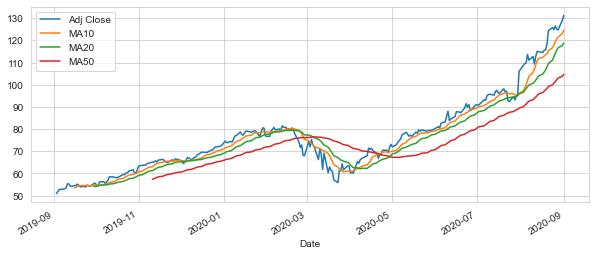

In [19]:
AAPL[["Adj Close", "MA10","MA20","MA50"]].plot(subplots=False, figsize=(10,4))

In [20]:
AAPL["Daily Return"] = AAPL["Adj Close"].pct_change()

In [21]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA10,MA20,MA50,Daily Return
Date,,,,,,,,,,
2019-09-03,51.744999,51.055000,51.607498,51.424999,80092000.0,50.919777,NaN,NaN,NaN,NaN
2019-09-04,52.369999,51.830002,52.097500,52.297501,76752400.0,51.783714,NaN,NaN,NaN,0.016967
2019-09-05,53.492500,52.877499,53.000000,53.320000,95654800.0,52.796162,NaN,NaN,NaN,0.019551
2019-09-06,53.605000,53.127499,53.512501,53.314999,77449200.0,52.791210,NaN,NaN,NaN,-0.000094
2019-09-09,54.110001,52.767502,53.709999,53.542500,109237600.0,53.016479,NaN,NaN,NaN,0.004267


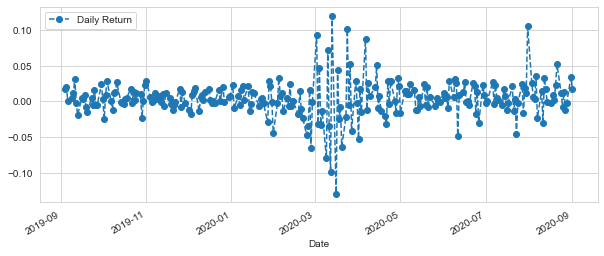

In [24]:
AAPL["Daily Return"].plot(figsize=(10,4), legend=True, linestyle="--", marker="o")

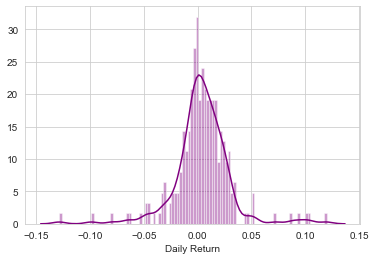

In [26]:
sns.distplot(AAPL["Daily Return"].dropna(), bins=100, color="purple")

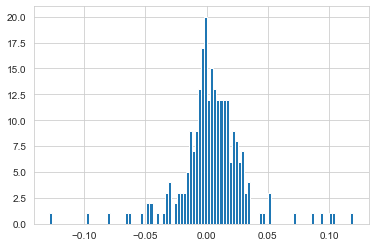

In [28]:
AAPL["Daily Return"].hist(bins=100)

In [30]:
closing_df= DataReader(["AAPL","GOOG", "MSFT", "AMZN"], "yahoo", start, end)["Adj Close"]

In [31]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-03,50.919777,1168.390015,134.508682,1789.839966
2019-09-04,51.783714,1181.410034,136.080795,1800.619995
2019-09-05,52.796162,1211.380005,138.473541,1840.719971
2019-09-06,52.791210,1204.930054,137.534241,1833.510010
2019-09-09,53.016479,1204.410034,135.972031,1831.349976


In [32]:
tech_rets = closing_df.pct_change()

In [33]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-03,NaN,NaN,NaN,NaN
2019-09-04,0.016967,0.011144,0.011688,0.006023
2019-09-05,0.019551,0.025368,0.017583,0.022270
2019-09-06,-0.000094,-0.005324,-0.006783,-0.003917
2019-09-09,0.004267,-0.000432,-0.011359,-0.001178


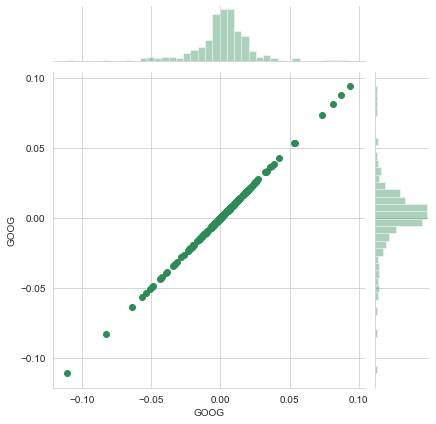

In [37]:
sns.jointplot("GOOG", "GOOG", tech_rets, kind="scatter", color="seagreen")

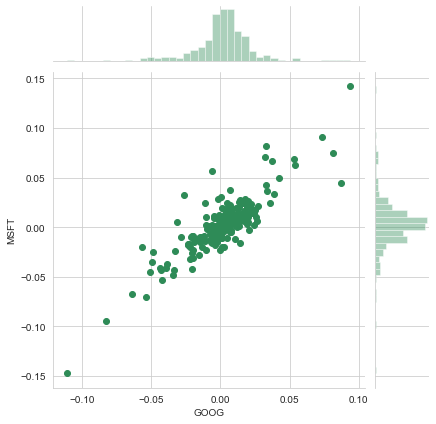

In [38]:
sns.jointplot("GOOG", "MSFT", tech_rets, kind="scatter", color="seagreen")

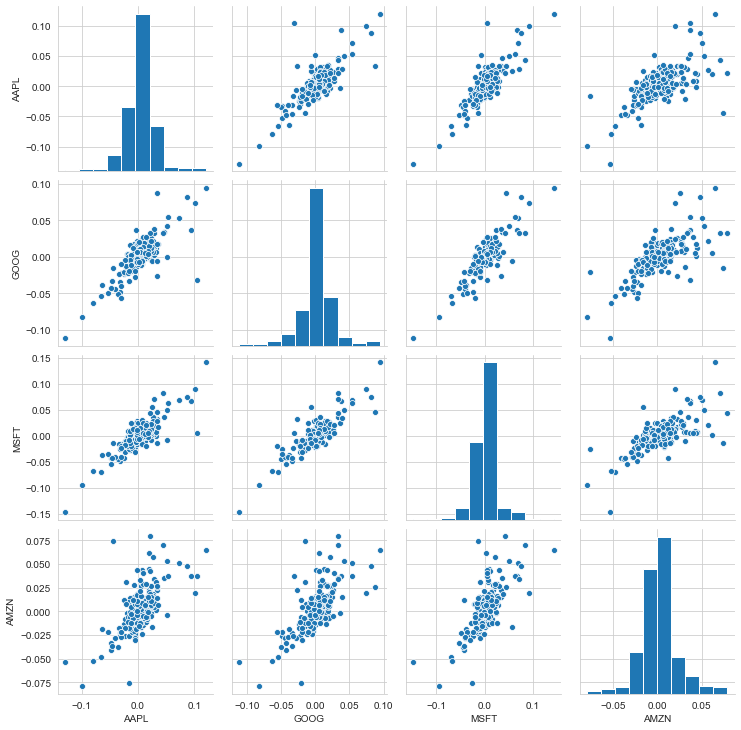

In [39]:
sns.pairplot(tech_rets.dropna())

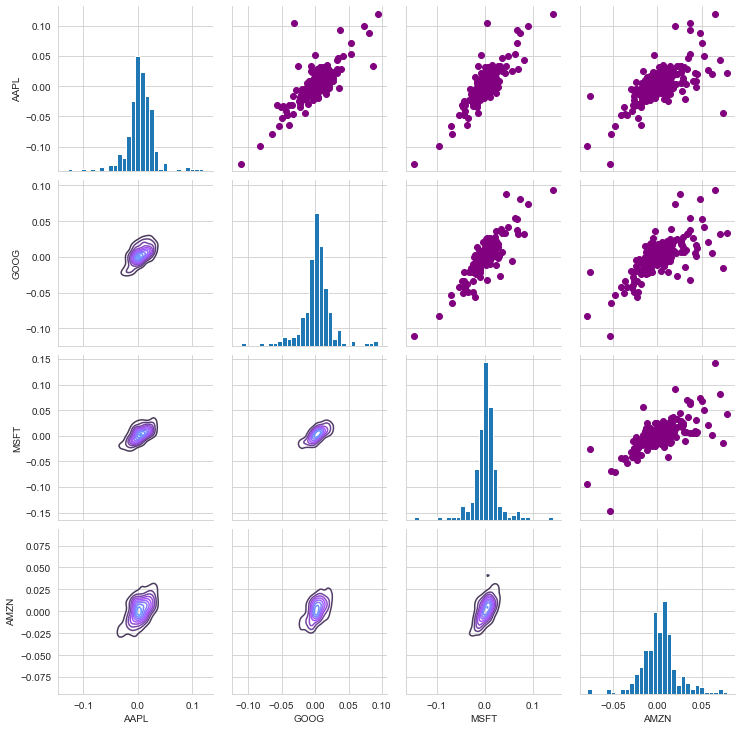

In [41]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color="purple")
returns_fig.map_lower(sns.kdeplot, cmap="cool_d")
returns_fig.map_diag(plt.hist, bins=30)

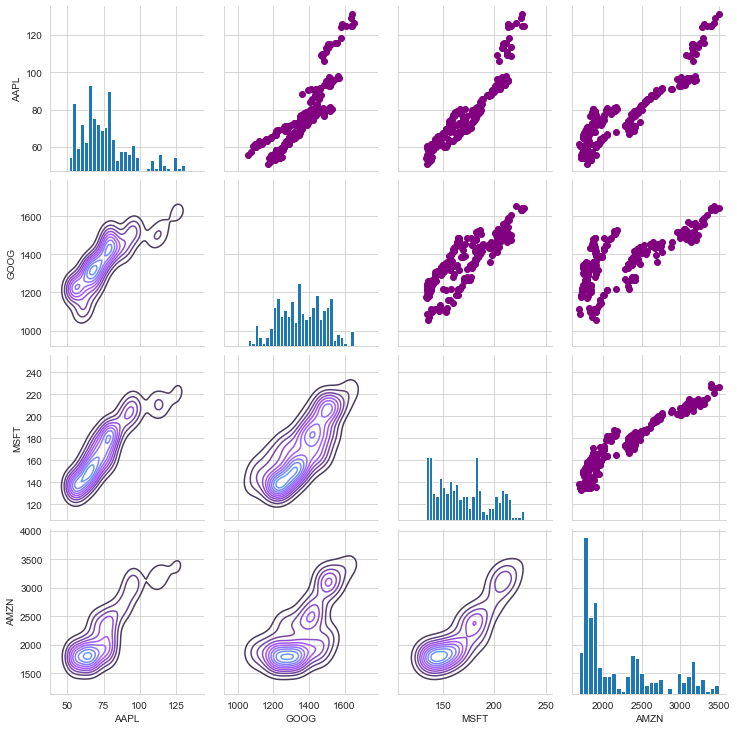

In [42]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color="purple")
returns_fig.map_lower(sns.kdeplot, cmap="cool_d")
returns_fig.map_diag(plt.hist, bins=30)

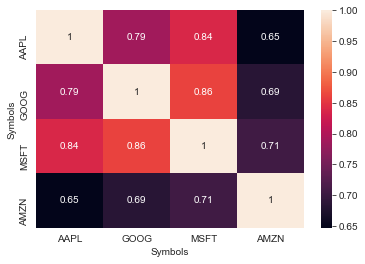

In [43]:
sns.heatmap(tech_rets.corr(), annot=True)

In [44]:
rets = tech_rets.dropna()

In [45]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-04,0.016967,0.011144,0.011688,0.006023
2019-09-05,0.019551,0.025368,0.017583,0.022270
2019-09-06,-0.000094,-0.005324,-0.006783,-0.003917
2019-09-09,0.004267,-0.000432,-0.011359,-0.001178
2019-09-10,0.011813,0.001320,-0.010471,-0.005897


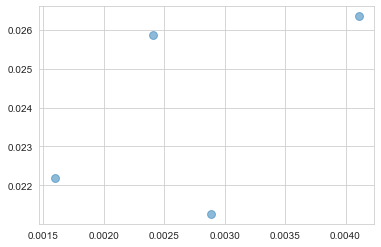

In [47]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)

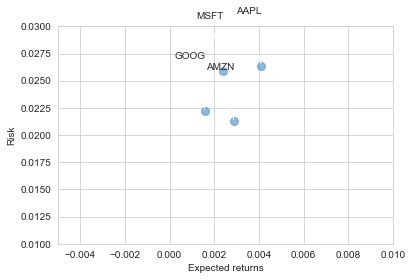

In [54]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)
plt.ylim([0.01, 0.03])
plt.xlim([-0.005,0.01])

plt.xlabel("Expected returns")
plt.ylabel("Risk")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()): 
    plt.annotate(label, xy=(x,y), xytext=(0,50),
                 textcoords="offset points", ha="right", va="bottom",
                 arrowprops = dict(arrowstyle="-", connectionstyle="arc3"))

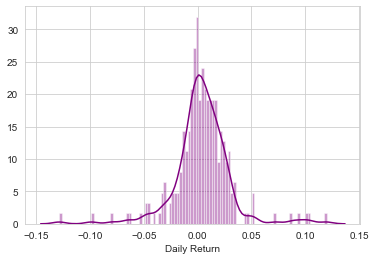

In [56]:
sns.distplot(AAPL["Daily Return"].dropna(), bins=100, color="purple")

In [57]:
rets["AAPL"].quantile(0.05)

-0.033082823347084525

In [58]:
#value at risk(1年後の未来)をシミュレーションで計算する。ブラウン運動モデルを使ってシミュレーション
days = 365
dt = 1/days
mu = rets.mean()["GOOG"]
sigma = rets.std()["GOOG"]

In [59]:
def stock_mote_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

In [60]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-03,1186.890015,1163.199951,1177.030029,1168.390015,1479900,1168.390015
2019-09-04,1183.479980,1171.000000,1176.709961,1181.410034,1068900,1181.410034
2019-09-05,1213.040039,1191.530029,1191.530029,1211.380005,1408100,1211.380005
2019-09-06,1212.015015,1202.521973,1208.130005,1204.930054,1072100,1204.930054
2019-09-09,1220.000000,1192.619995,1204.000000,1204.410034,1471900,1204.410034


Text(0.5, 1.0, 'Monte Carlo Analysis')

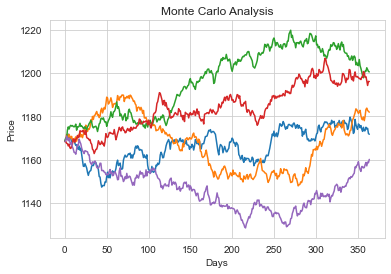

In [61]:
start_price = GOOG.iloc[0,5]

for run in range(5):
    plt.plot(stock_mote_carlo(start_price, days, mu, sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis")

In [64]:
runs = 1000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run]= stock_mote_carlo(start_price, days, mu, sigma)[days-1]

(array([1., 1., 0., ..., 0., 0., 1.]),
 array([1094.58689318, 1095.43391576, 1096.28093834, ..., 1262.29736393,
        1263.14438651, 1263.99140909]),
 <a list of 200 Patch objects>)

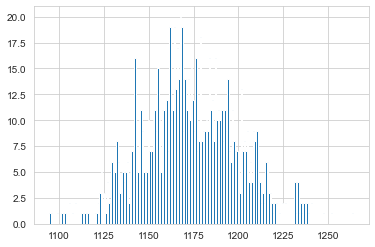

In [65]:
plt.hist(simulations, bins=200)

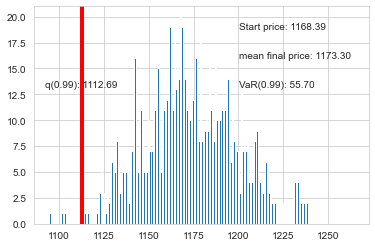

In [68]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

plt.figtext(0.6,0.8, s="Start price: {:0.2f}".format(start_price))
plt.figtext(0.6, 0.7, "mean final price: {:0.2f}".format(simulations.mean()))
plt.figtext(0.6,0.6, "VaR(0.99): {:0.2f}".format(start_price-q))
plt.figtext(0.15, 0.6, "q(0.99): {:0.2f}".format(q))
            
plt.axvline(x=q, linewidth=4, color="r")

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [5]:
%matplotlib inline

In [6]:
import requests

In [7]:
from io import StringIO

In [8]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

In [9]:
source = requests.get(url).text

In [10]:
source

'Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration\nPolitico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000,Likely Voters,Live Phone,47.0,47.0,6.0,,https://elections.huffingtonpost.com/pollster/polls/politico-gwu-battleground-16674,http://www.politico.com/news/stories/1112/83380.html,Nonpartisan,None,,1\nYouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740,Likely Voters,Internet,49.0,47.0,3.0,,https://elections.huffingtonpost.com/pollster/polls/yougov-economist-16733,http://cdn.yougov.com/cumulus_uploads/document/6pkdh10fns/econToplines.pdf,Nonpartisan,None,,1\nGravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872,Likely Voters,Automated Phone,48.0,48.0,4.0,,https://elections.huffingtonpost.com/pollster/polls/gravis-marketing-16681,http://www.gravispolls.com/2012/11/gravis-marketing-national-poll-shows.h

In [55]:
poll_data = StringIO(source)

In [56]:
poll_df = pd.read_csv(poll_data)

In [57]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [58]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [59]:
poll_df[["Pollster", "Partisan", "Affiliation"]].sort_values("Pollster").drop_duplicates()

,Pollster,Partisan,Affiliation
404,ABC/Post,Nonpartisan,None
471,AP-GfK,Nonpartisan,None
90,ARG,Nonpartisan,None
132,Allstate/National Journal,Nonpartisan,None
305,Angus-Reid,Nonpartisan,None
...,...,...,...
105,United Technologies/National Journal,Nonpartisan,None
62,Washington Times/JZ Analytics,Nonpartisan,None
18,YouGov,Nonpartisan,None
533,YouGov/Economist,Nonpartisan,None


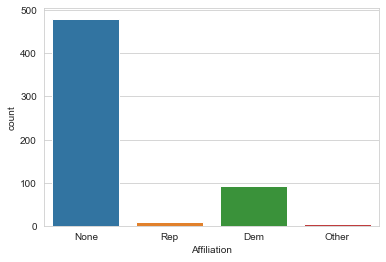

In [60]:
sns.countplot("Affiliation", data=poll_df)

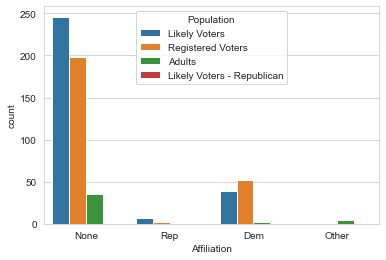

In [61]:
sns.countplot("Affiliation", data=poll_df, hue="Population")

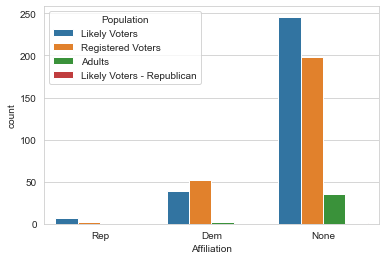

In [62]:
sns.countplot("Affiliation", data=poll_df, hue="Population", order=["Rep", "Dem", "None"])

In [63]:
avg = pd.DataFrame(poll_df.mean())

In [64]:
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [65]:
avg.drop("Number of Observations", axis=0, inplace=True)

In [66]:
avg.drop(["Question Text", "Question Iteration"], axis=0, inplace=True)

In [67]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [68]:
std = pd.DataFrame(poll_df.std())

In [69]:
std.drop(["Number of Observations","Question Text", "Question Iteration"], axis=0, inplace=True)

In [70]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


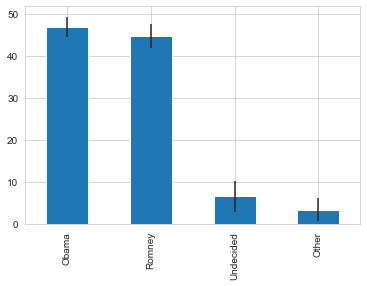

In [71]:
avg.plot(yerr=std,kind="bar", legend=False)

In [72]:
poll_avg = pd.concat([avg,std], axis=1)
poll_avg.columns = ["Average", "STD"]

In [73]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


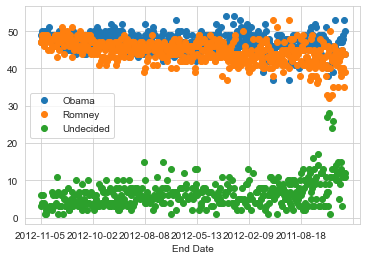

In [74]:
poll_df.plot(x="End Date", y=["Obama", "Romney","Undecided"], marker="o", linestyle="")

In [75]:
from datetime import datetime

In [76]:
poll_df["Difference"] = (poll_df.Obama - poll_df.Romney)/100

In [77]:
poll_df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,PPP (D),2009-07-15,2009-07-16,2010-11-08T11:02:37Z,577.0,Registered Voters,Automated Phone,49.0,40.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.09
582,PPP (D),2009-06-12,2009-06-16,2010-11-08T10:58:00Z,638.0,Registered Voters,Automated Phone,48.0,40.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.08
583,PPP (D),2009-05-14,2009-05-18,2010-11-08T10:49:08Z,1000.0,Registered Voters,Automated Phone,53.0,35.0,12.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.18
584,PPP (D),2009-04-17,2009-04-19,2010-11-08T10:45:18Z,686.0,Registered Voters,Automated Phone,50.0,39.0,11.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/surveys...,Pollster,Dem,NaN,1,0.11


In [78]:
poll_df = poll_df.groupby(["Start Date"],as_index=False).mean()

In [79]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


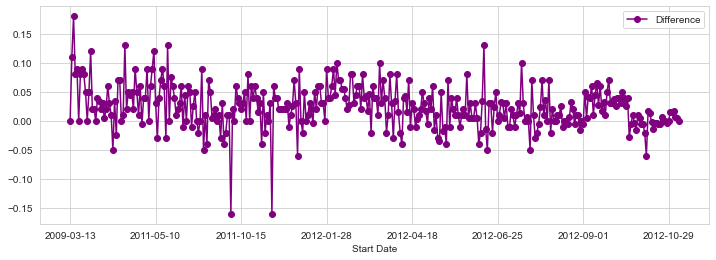

In [80]:
fig = poll_df.plot("Start Date", "Difference", figsize=(12,4), marker="o", linestyle="-", color="purple")

In [81]:
poll_df[poll_df["Start Date"].apply(lambda x:x.startswith("2012-10"))]

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
325,2012-10-01,1746.000000,48.500000,46.000000,3.000000,NaN,NaN,1,0.025000
326,2012-10-02,590.000000,49.000000,45.000000,6.000000,NaN,NaN,1,0.040000
327,2012-10-04,1061.500000,45.833333,48.666667,6.000000,NaN,NaN,1,-0.028333
328,2012-10-05,1000.000000,46.000000,46.500000,7.000000,1.000000,NaN,1,-0.005000
329,2012-10-06,895.000000,46.500000,45.500000,4.500000,3.000000,NaN,1,0.010000
330,2012-10-07,1197.333333,47.000000,47.333333,4.666667,1.500000,NaN,1,-0.003333
331,2012-10-08,2030.000000,46.500000,48.000000,5.000000,2.000000,NaN,1,-0.015000
332,2012-10-10,1118.000000,48.000000,47.000000,3.500000,2.000000,NaN,1,0.010000
333,2012-10-11,1335.250000,47.000000,46.500000,5.666667,1.666667,NaN,1,0.005000
334,2012-10-12,1231.500000,46.500000,47.000000,6.500000,NaN,NaN,1,-0.005000


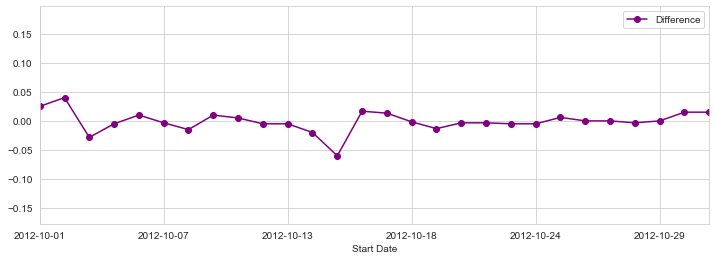

In [82]:
fig = poll_df.plot("Start Date", "Difference", figsize=(12,4), marker="o", linestyle="-", color="purple", xlim=(325,352))

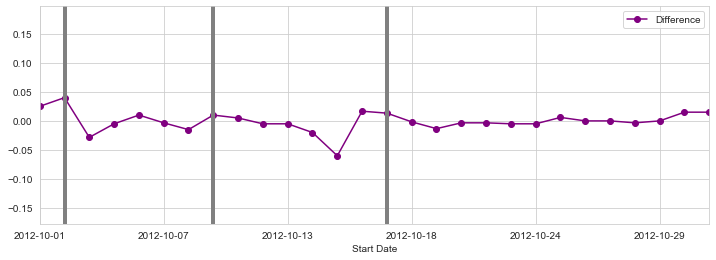

In [83]:
fig = poll_df.plot("Start Date", "Difference", figsize=(12,4), marker="o", linestyle="-", color="purple", xlim=(325,352))
plt.axvline(x=326, linewidth=4, color="gray")
plt.axvline(x=332, linewidth=4, color="gray")
plt.axvline(x=339, linewidth=4, color="gray")

In [85]:
donor_df=pd.read_csv("Election_Donor_Data.csv")

/Users/tk/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [88]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [89]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [91]:
donor_df["contb_receipt_amt"].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [92]:
donor_df["contb_receipt_amt"].value_counts().shape

(8079,)

In [93]:
don_mean=donor_df["contb_receipt_amt"].mean()
don_std = donor_df["contb_receipt_amt"].std()
print("平均{:0.2f} 標準偏差{:0.2f}".format(don_mean,don_std))

平均298.24 標準偏差3749.67


In [96]:
top_donor = donor_df["contb_receipt_amt"].copy()
top_donor=top_donor.sort_values()
top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

In [97]:
top_donor = top_donor[top_donor > 0]

In [99]:
top_donor.sort_values()
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

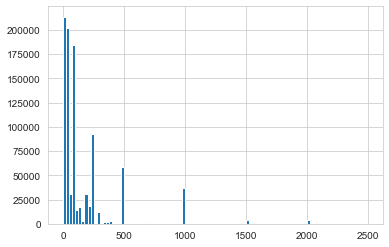

In [100]:
com_don = top_donor[top_donor < 2500]
com_don.hist(bins=100)

In [102]:
candidates = donor_df.cand_nm.unique()

In [103]:
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [104]:
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}
donor_df["Party"] = donor_df.cand_nm.map(party_map)

In [105]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [107]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

In [108]:
donor_df.groupby("cand_nm")["contb_receipt_amt"].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [109]:
donor_df.groupby("cand_nm")["contb_receipt_amt"].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [110]:
cand_amount =donor_df.groupby("cand_nm")["contb_receipt_amt"].sum()

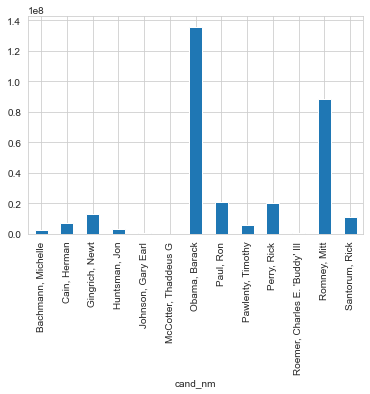

In [112]:
cand_amount.plot(kind="bar")

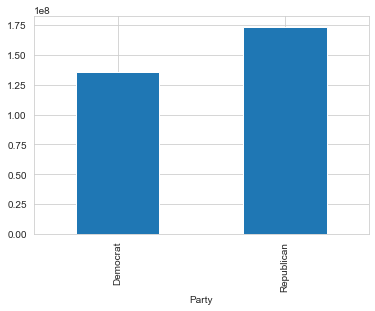

In [114]:
donor_df.groupby("Party")["contb_receipt_amt"].sum().plot(kind="bar")

In [115]:
occupation_df = donor_df.pivot_table("contb_receipt_amt",
                                    index="contbr_occupation",
                                    columns="Party", aggfunc="sum")

In [116]:
occupation_df

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [117]:
occupation_df.shape

(45067, 2)

In [118]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [119]:
occupation_df.shape

(31, 2)

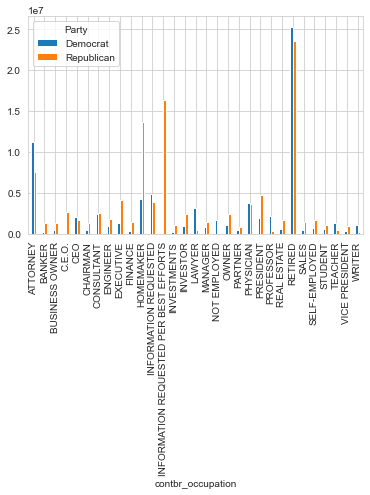

In [120]:
occupation_df.plot(kind="bar")

In [121]:
occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06


In [122]:
occupation_df.drop(["INFORMATION REQUESTED PER BEST EFFORTS","INFORMATION REQUESTED"], axis=0, inplace=True)

/Users/tk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [123]:
occupation_df.loc["CEO"]=occupation_df.loc["CEO"] + occupation_df.loc["C.E.O."]

/Users/tk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-123-66b38a1b288d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_df.loc["CEO"]=occupation_df.loc["CEO"] + occupation_df.loc["C.E.O."]


In [124]:
occupation_df.drop("C.E.O.", inplace=True)

/Users/tk/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [132]:
occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
CEO,2074974.79,4.211041e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
FINANCE,296031.40,1.402515e+06


ValueError: '' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

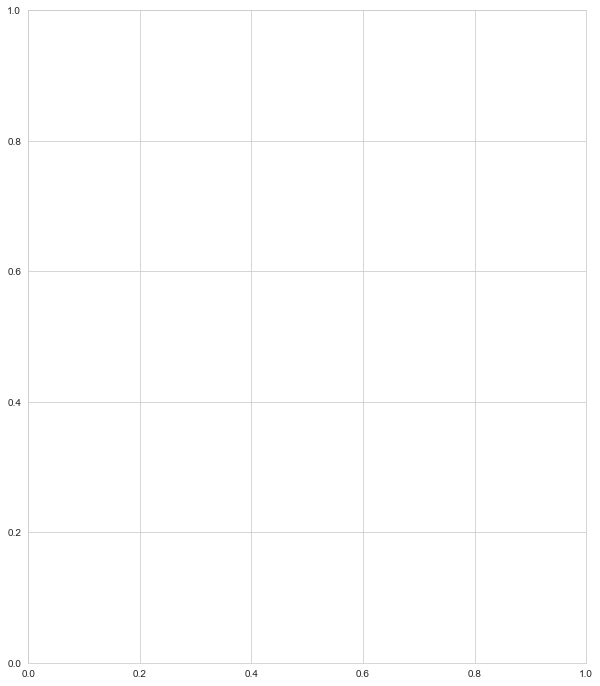

In [133]:
occupation_df.plot(kind="barh", figsize=(10,12), cmap="")